Epoch [1/20], Loss: 0.0027

Epoch [2/20], Loss: 0.0017

Epoch [3/20], Loss: 0.0014

Epoch [4/20], Loss: 0.0013

Epoch [5/20], Loss: 0.0012

Epoch [6/20], Loss: 0.0011

Epoch [7/20], Loss: 0.0011

Epoch [8/20], Loss: 0.0010

Epoch [9/20], Loss: 0.0010

Epoch [10/20], Loss: 0.0010

Epoch [11/20], Loss: 0.0009

Epoch [12/20], Loss: 0.0009

Epoch [13/20], Loss: 0.0009

Epoch [14/20], Loss: 0.0009

Epoch [15/20], Loss: 0.0009

Epoch [16/20], Loss: 0.0009

Epoch [17/20], Loss: 0.0009

Epoch [18/20], Loss: 0.0009

Epoch [19/20], Loss: 0.0009

Epoch [20/20], Loss: 0.0009


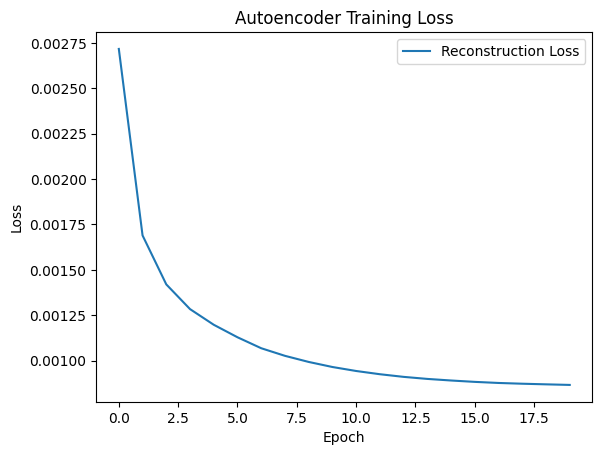

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
batch_size = 128
learning_rate = 0.001
epochs = 20
latent_dim = 32

# Load CSV data
train_data = pd.read_csv('/content/sample_data/mnist_train_small.csv').values
test_data = pd.read_csv('/content/sample_data/mnist_test.csv').values

# Extract features and labels
train_features, train_labels = train_data[:, 1:], train_data[:, 0]
test_features, test_labels = test_data[:, 1:], test_data[:, 0]

# Convert to PyTorch tensors
train_features = torch.FloatTensor(train_features) / 255.0  # Normalize to [0, 1]
test_features = torch.FloatTensor(test_features) / 255.0  # Normalize to [0, 1]
train_labels = torch.LongTensor(train_labels)
test_labels = torch.LongTensor(test_labels)

# Create DataLoader
train_dataset = TensorDataset(train_features, train_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_dim, latent_dim), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(latent_dim, input_dim), nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Choose optimizer and criterion
autoencoder_model = Autoencoder(input_dim=784, latent_dim=latent_dim)
autoencoder_optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Training function for autoencoder
def train_autoencoder(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            inputs, _ = data

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader.dataset)
        losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return losses

# Train autoencoder and get losses
losses = train_autoencoder(autoencoder_model, train_loader, criterion, autoencoder_optimizer, epochs)

# Plot the losses
plt.plot(losses, label='Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()


Epoch [1/20], Loss: 224.0300, KL Divergence: 11.4994

Epoch [2/20], Loss: 159.6357, KL Divergence: 15.8093

Epoch [3/20], Loss: 142.4170, KL Divergence: 18.9862

Epoch [4/20], Loss: 133.2356, KL Divergence: 20.8597

Epoch [5/20], Loss: 127.6266, KL Divergence: 22.0297

Epoch [6/20], Loss: 123.8595, KL Divergence: 22.7179

Epoch [7/20], Loss: 121.0557, KL Divergence: 23.2215

Epoch [8/20], Loss: 118.7791, KL Divergence: 23.6661

Epoch [9/20], Loss: 117.1212, KL Divergence: 23.9977

Epoch [10/20], Loss: 115.7023, KL Divergence: 24.2191

Epoch [11/20], Loss: 114.5339, KL Divergence: 24.4743

Epoch [12/20], Loss: 113.6012, KL Divergence: 24.6477

Epoch [13/20], Loss: 112.6469, KL Divergence: 24.7490

Epoch [14/20], Loss: 112.0522, KL Divergence: 24.9079

Epoch [15/20], Loss: 111.4294, KL Divergence: 25.0109

Epoch [16/20], Loss: 110.8129, KL Divergence: 25.0999

Epoch [17/20], Loss: 110.3726, KL Divergence: 25.1986

Epoch [18/20], Loss: 109.9028, KL Divergence: 25.2574

Epoch [19/20], Loss

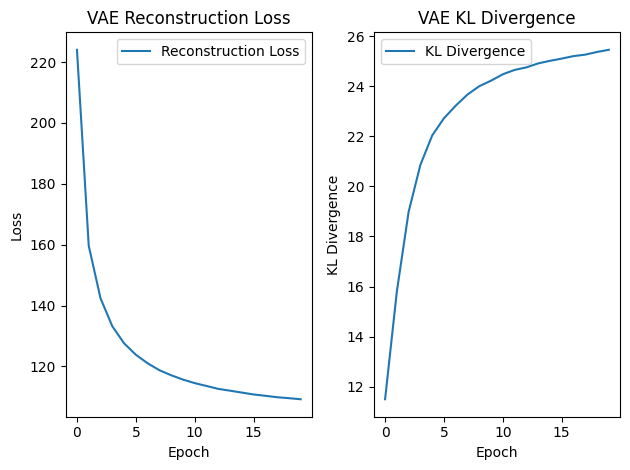

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
batch_size = 128
learning_rate = 0.001
epochs = 20
latent_dim = 32

# Load CSV data
train_data = pd.read_csv('/content/sample_data/mnist_train_small.csv').values
test_data = pd.read_csv('/content/sample_data/mnist_test.csv').values

# Extract features and labels
train_features, train_labels = train_data[:, 1:], train_data[:, 0]
test_features, test_labels = test_data[:, 1:], test_data[:, 0]

# Convert to PyTorch tensors
train_features = torch.FloatTensor(train_features) / 255.0  # Normalize to [0, 1]
test_features = torch.FloatTensor(test_features) / 255.0  # Normalize to [0, 1]
train_labels = torch.LongTensor(train_labels)
test_labels = torch.LongTensor(test_labels)

# Create DataLoader
train_dataset = TensorDataset(train_features, train_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Variational Autoencoder architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc21 = nn.Linear(256, latent_dim)
        self.fc22 = nn.Linear(256, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 256)
        self.fc4 = nn.Linear(256, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc21(h), self.fc22(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function for VAE
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

# Choose optimizer and criterion
vae_model = VAE(input_dim=784, latent_dim=latent_dim)
vae_optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)

# Training function for variational autoencoder
def train_vae(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    losses = []
    kl_divergences = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        epoch_kl_divergence = 0.0
        for data in train_loader:
            inputs, _ = data

            optimizer.zero_grad()
            outputs, mu, logvar = model(inputs)
            loss = criterion(outputs, inputs, mu, logvar)

            KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_kl_divergence += KLD.item()

        epoch_loss /= len(train_loader.dataset)
        epoch_kl_divergence /= len(train_loader.dataset)
        losses.append(epoch_loss)
        kl_divergences.append(epoch_kl_divergence)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, KL Divergence: {epoch_kl_divergence:.4f}')

    return losses, kl_divergences

# Train VAE and get losses
vae_losses, vae_kl_divergences = train_vae(vae_model, train_loader, vae_loss, vae_optimizer, epochs)



# Plot the reconstruction loss
plt.subplot(1, 2, 1)
plt.plot(vae_losses, label='Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VAE Reconstruction Loss')
plt.legend()

# Plot KL divergence
plt.subplot(1, 2, 2)
plt.plot(vae_kl_divergences, label='KL Divergence')
plt.xlabel('Epoch')
plt.ylabel('KL Divergence')
plt.title('VAE KL Divergence')
plt.legend()

plt.tight_layout()
plt.show()

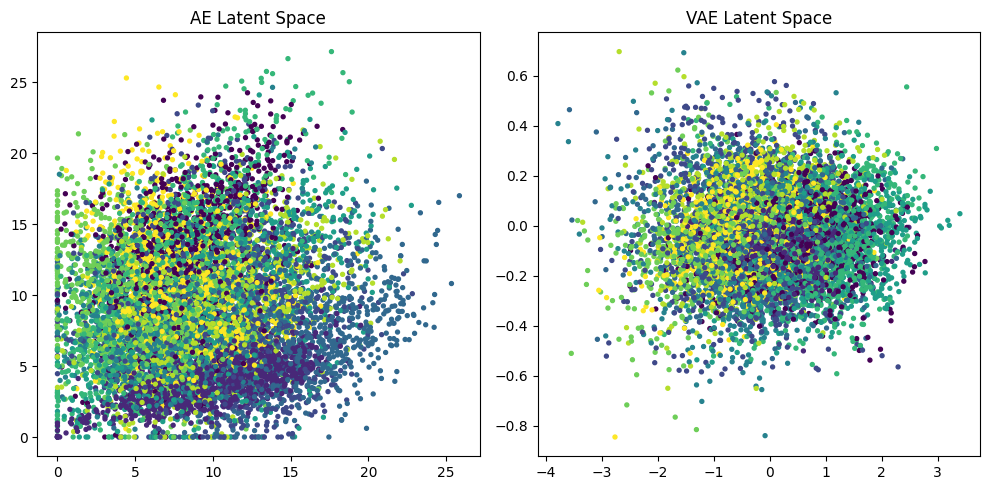

In [15]:
# Latent space
def get_autoencoder_latent_representation(model, data_loader):
    model.eval()
    latent_space = []
    with torch.no_grad():
        for data in data_loader:
            inputs, _ = data
            latent_space.append(model.encoder(inputs.view(-1, 784)).numpy())
    return np.concatenate(latent_space, axis=0)

# Get latent representations for both models
autoencoder_latent = get_autoencoder_latent_representation(autoencoder_model, test_loader)
vae_latent = get_latent_representation(vae_model, test_loader)

# Plot the latent space
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(autoencoder_latent[:, 0], autoencoder_latent[:, 1], c=test_labels.numpy(), cmap='viridis', s=8)
plt.title('AE Latent Space')

plt.subplot(1, 2, 2)
plt.scatter(vae_latent[:, 0], vae_latent[:, 1], c=test_labels.numpy(), cmap='viridis', s=8)
plt.title('VAE Latent Space')

plt.tight_layout()
plt.show()
